#  Определение выгодного тарифа для телеком компании

## Содержание
1. [Описание проекта](#id_description)
2. [Обзор данных](#id_data)
3. [Предобработка данных](#id_preprocessing)
4. [Расчёты и добавление результатов в таблицу](#id_calculations)
5. [Исследовательский анализ данных](#id_eda)
6. [Проверка гипотез](#id_hypotises_testing)
7. [Общий вывод](#id_conclusion)



## Описание проекта
<a id="id_description"></a>


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

*Описание тарифов*

Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

*Примечание:*

- «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель**

Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Ход исследования**

Данные с информацией о квартире хранятся в файлах `/datasets/calls.csv`,`/datasets/internet.csv`,`/datasets/messages.csv`,`/datasets/tariffs.csv` и `/datasets/users.csv.`. 
Заранее не известно есть ли в данных ошибки, аномалии и/или дубликаты.
Поэтому перед основным исследованием понадобится обзор и предобработка данных. 
Также для исследования понадобятся параметры расчитанные на основе имеющихся данных.

Таким образом, исследование будет включать следующие этапы:
 1. Обзор данных.
 2. Предобработка данных
 3. Расчёты и добавление результатов в таблицу
 4. Исследовательский анализ данных
 5. Проверка гипотез


## Обзор данных
<a id="id_data"></a>

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data_calls = pd.read_csv('data-files/calls.csv')
    data_internet = pd.read_csv('data-files/internet.csv')
    data_messages = pd.read_csv('data-files/messages.csv')
    data_tariffs = pd.read_csv('data-files/tariffs.csv')
    data_users = pd.read_csv('data-files/users.csv')  # Локальный путь
except:
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet = pd.read_csv('/datasets/internet.csv')
    data_messages = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')  # Серверный путь

In [3]:
data_calls.info()
data_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_internet.info()
data_internet.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [5]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
data_users.info()
data_users.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Согласно документации к данным в таблицах есть следующие столбцы:

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


### Вывод

В таблицах представлены данные по каждому пользователю.
Есть таблица с данными пользователя: фамилия, имя, тариф и день регистрации. 
Есть таблицы описывающие поведение пользователей -- количесво и длительность звонков, количесво отправленных сообщений, использованные трафик.

В данных не обнаружено пропусков. Единственные пропущенные значения в таблице `users` в колонке `churn_date` -- дата прекращения пользования тарифом. Но в данном случае пропущенное значение означает, что на момент выгрузки данных тариф ещё действует.

Также есть еще одна особенность данных -- звонки с нулевой продолжительностью, которые обозначают пропущенные звонки.

Из предварительного анализа данных, можно сказать, что данные качесвенные и серьезной предобработки не требуют.


## Предобработка данных
<a id="id_preprocessing"></a>

Из задания изветсно, что «Мегалайн» всегда округляет секунды до минут, поэтому  приведем колонку `duration` из таблицы `calls` к типу int, перед этим применив метод ceil().

In [8]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype(int)

Преобразуем все колонки содержащие даты к типу DateTime

In [9]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Удалим колонку `Unnamed: 0`. Она содержит нумерацию сторк и в таблицу попала явно случайно при выгрузке данных

In [10]:
data_internet = data_internet.drop('Unnamed: 0', 1)
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


**Проверка на наличие явных дубликатов**

In [11]:
data_calls.duplicated().sum()

0

In [12]:
data_internet.duplicated().sum()

0

In [13]:
data_messages.duplicated().sum()

0

In [14]:
data_users.duplicated().sum()

0

### Вывод

На этапе предобработки были сделаны следующие пункты:

- колонка `duration` из таблицы `calls` преобразована к типу int с округлением вверх;
- все колонки содержащие даты преобразованы к типу DateTime;
- удалена колонку `Unnamed: 0`;
- данные проверены на явные дубликаты.


## Расчёты и добавление результатов в таблицу
<a id="id_calculations"></a>

Для дальнейшего анализа необходимо посчитать для каждого пользователя следующие параметры:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [15]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
month_calls = data_calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'month_calls_number'})

In [16]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
month_messages = data_messages.groupby(['user_id', 'month'])\
                  .agg({'id':'count'})\
                  .reset_index()\
                  .rename(columns={'id':'month_messages_number'})

In [17]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
month_internet = data_internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .reset_index()\
                  .rename(columns={'mb_used':'month_mb_used'})

Соединим полученные таблицы в одну для удобства

In [18]:
month_data = month_calls.merge(month_messages, on=['user_id','month'], how = 'outer')\
                        .merge(month_internet, on=['user_id','month'], how = 'outer')
month_data.head()

,user_id,month,month_calls_duration,month_calls_number,month_messages_number,month_mb_used
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91


Теперь необходимо рассчитать помесячную выручку с каждого пользователя.
Для этого добавим в `month_data` информацию о том, какой тариф пользователь использует и о самом тарифе.

In [19]:
month_data = month_data.merge(data_users[['user_id','city','tariff']], on='user_id', how='left' )

data_tariffs = data_tariffs.rename(columns={'tariff_name':'tariff'})
month_data = month_data.merge(data_tariffs, on='tariff', how='left')
month_data

,user_id,month,month_calls_duration,month_calls_number,month_messages_number,month_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,19559.44,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,17491.56,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17322.51,Санкт-Петербург,smart,50,15360,500,550,200,3,3


Заполним нулями все NaN, так как они говорять о не использовании.

In [20]:
month_data = month_data.fillna(0)
month_data.isna().sum()

user_id                  0
month                    0
month_calls_duration     0
month_calls_number       0
month_messages_number    0
month_mb_used            0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Расчитаем помесячную выручку по формуле - вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану

In [21]:
def month_fee(row):
    messages = (row['month_messages_number'] - row['messages_included']) * row['rub_per_message']
    calls = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    internet = (row['month_mb_used'] - row['mb_per_month_included'])/1024
    internet = np.ceil(internet) * row['rub_per_gb'] # Округлим вверх до гигибайт, как сказано в задании
    
    total_fee = 0
    for options in [messages,calls,internet]:
        if options > 0:
            total_fee += options
    
    total_fee += row['rub_monthly_fee']
    return total_fee


In [22]:
month_data['month_fee'] = month_data.apply(month_fee, axis=1)
month_data.head(10)

,user_id,month,month_calls_duration,month_calls_number,month_messages_number,month_mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_fee
0,1000,5,159.0,22.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,43.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,47.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,52.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,58.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,350.0,57.0,73.0,14702.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,338.0,43.0,58.0,14756.47,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,333.0,46.0,70.0,9817.61,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11,430.0,59.0,0.0,18429.34,Москва,smart,50,15360,500,550,200,3,3,1150.0
9,1001,12,414.0,63.0,0.0,14036.66,Москва,smart,50,15360,500,550,200,3,3,550.0


### Вывод

Посчитано и добавлено в таблицу:
посчитать для каждого пользователя следующие параметры:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

## Исследовательский анализ данных
<a id="id_eda"></a>

In [23]:
print('Тариф ULTRA')

print('Количество минут в месяц')
print('среднее:', month_data[month_data['tariff'] == 'ultra']['month_calls_duration'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'ultra']['month_calls_duration'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'ultra']['month_calls_duration'].std().round(3))

print('Количество сообщений в месяц')
print('среднее:', month_data[month_data['tariff'] == 'ultra']['month_messages_number'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'ultra']['month_messages_number'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'ultra']['month_messages_number'].std().round(3))

print('Количество мегабайт в месяц')
print('среднее:', month_data[month_data['tariff'] == 'ultra']['month_mb_used'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'ultra']['month_mb_used'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'ultra']['month_mb_used'].std().round(3))

Тариф ULTRA
Количество минут в месяц
среднее: 526.623
дисперсия: 100873.633
стандартное отклонение: 317.606
Количество сообщений в месяц
среднее: 49.363
дисперсия: 2285.266
стандартное отклонение: 47.804
Количество мегабайт в месяц
среднее: 19468.805
дисперсия: 101751013.783
стандартное отклонение: 10087.171


In [24]:
print('Тариф SMART')

print('Количество минут в месяц')
print('среднее:', month_data[month_data['tariff'] == 'smart']['month_calls_duration'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'smart']['month_calls_duration'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'smart']['month_calls_duration'].std().round(3))

print('Количество сообщений в месяц')
print('среднее:', month_data[month_data['tariff'] == 'smart']['month_messages_number'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'smart']['month_messages_number'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'smart']['month_messages_number'].std().round(3))

print('Количество мегабайт в месяц')
print('среднее:', month_data[month_data['tariff'] == 'smart']['month_mb_used'].mean().round(3))
print('дисперсия:', month_data[month_data['tariff'] == 'smart']['month_mb_used'].var().round(3))
print('стандартное отклонение:', month_data[month_data['tariff'] == 'smart']['month_mb_used'].std().round(3))

Тариф SMART
Количество минут в месяц
среднее: 417.935
дисперсия: 36219.316
стандартное отклонение: 190.314
Количество сообщений в месяц
среднее: 33.384
дисперсия: 796.813
стандартное отклонение: 28.228
Количество мегабайт в месяц
среднее: 16208.387
дисперсия: 34462496.463
стандартное отклонение: 5870.477


In [25]:
bins = 100
fig_size=(10,5)
opacity = 0.5

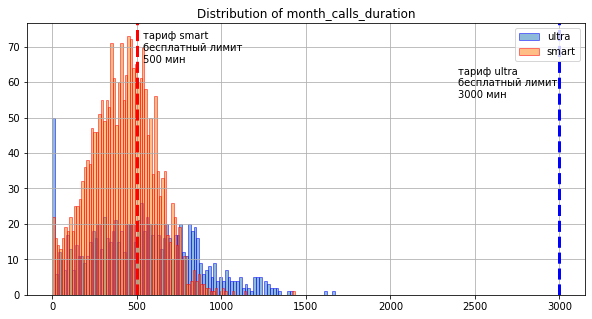

In [26]:
month_data[month_data['tariff'] == 'ultra']['month_calls_duration'].hist(bins=bins, 
                                                                         alpha=opacity, 
                                                                         figsize=fig_size,
                                                                         edgecolor='blue',
                                                                         label='ultra')
month_data[month_data['tariff'] == 'smart']['month_calls_duration'].hist(bins=bins, 
                                                                         alpha=opacity, 
                                                                         figsize=fig_size,
                                                                         edgecolor='red',
                                                                         label='smart')
plt.axvline(x=3000, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=500, color='red', linestyle='dashed', linewidth=3)

plt.annotate('тариф smart\nбесплатный лимит\n500 мин',
             xy=(540, 65),
             va='bottom',
             ha='left',
             )

plt.annotate('тариф ultra\nбесплатный лимит\n3000 мин',
             xy=(2400, 55),
             va='bottom', 
             ha='left',
             )

plt.legend(loc='upper right')
plt.title('Distribution of month_calls_duration')
plt.show()

Распределение продолжительности звонков для обоих тарифов имеет распределение близкое к нормальному. 
Для тарифа SMART распределение слегка ассиметрично и скошено влево.

Интересен факт большего количесва пропущенных звонков (с нулевой продолжительностью) для пользователей тарифа ULTRA.

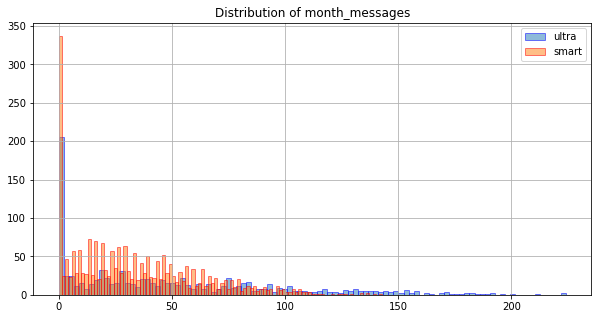

In [27]:
month_data[month_data['tariff'] == 'ultra']['month_messages_number'].hist(bins=bins, 
                                                                         alpha=opacity, 
                                                                         figsize=fig_size,
                                                                         edgecolor='blue',
                                                                         label='ultra')
month_data[month_data['tariff'] == 'smart']['month_messages_number'].hist(bins=bins, 
                                                                         alpha=opacity, 
                                                                         figsize=fig_size,
                                                                         edgecolor='red',
                                                                         label='smart')
plt.legend(loc='upper right')
plt.title('Distribution of month_messages')
plt.show()

Текстовые сообщения не пользуются популярностью, представим распределения без нулевого значения

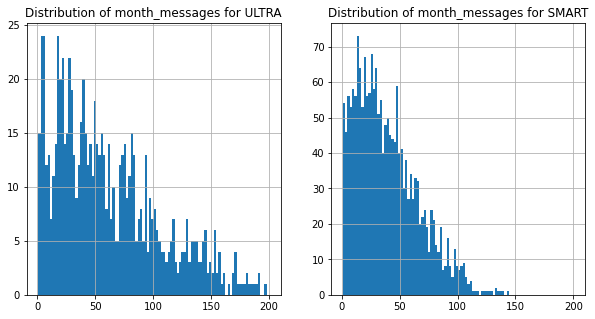

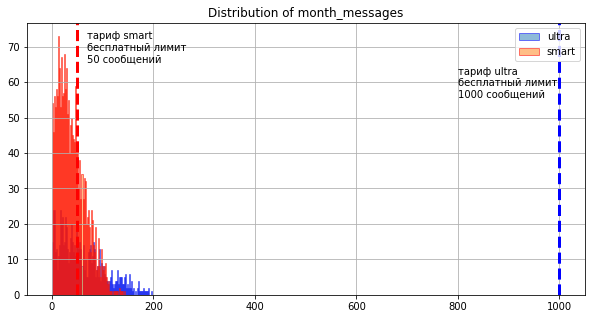

In [28]:
plt.subplot(1, 2, 1)
month_data[month_data['tariff'] == 'ultra']['month_messages_number'].hist(bins=100,figsize=(10,5),range=(1,200))
plt.title('Distribution of month_messages for ULTRA')

plt.subplot(1, 2, 2)
month_data[month_data['tariff'] == 'smart']['month_messages_number'].hist(bins=100,range=(1,200))
plt.title('Distribution of month_messages for SMART')

plt.show()

range=(1,200)
month_data[month_data['tariff'] == 'ultra']['month_messages_number'].hist(bins=bins,
                                                                          range=range,
                                                                          alpha=opacity, 
                                                                          figsize=fig_size,
                                                                          edgecolor='blue',
                                                                          label='ultra')
month_data[month_data['tariff'] == 'smart']['month_messages_number'].hist(bins=bins, 
                                                                          range=range,
                                                                          alpha=opacity, 
                                                                          figsize=fig_size,
                                                                          edgecolor='red',
                                                                          label='smart')
plt.axvline(x=1000, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=50, color='red', linestyle='dashed', linewidth=3)

plt.annotate('тариф smart\nбесплатный лимит\n50 сообщений',
             xy=(70, 65),
             va='bottom',
             ha='left',
             )

plt.annotate('тариф ultra\nбесплатный лимит\n1000 сообщений',
             xy=(800, 55),
             va='bottom', 
             ha='left',
             )

plt.legend(loc='upper right')
plt.title('Distribution of month_messages')
plt.show()

Распределение количесва сообщений в месяц для обоих тарифов имеет форму распределения Пуассона.

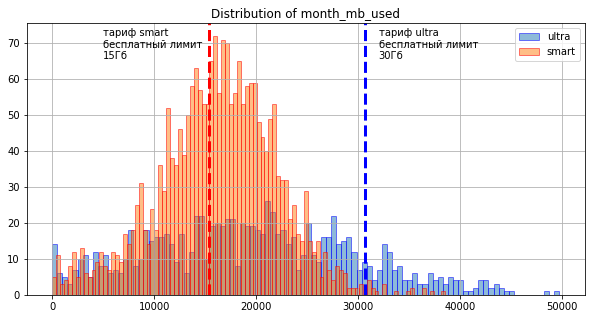

In [29]:
month_data[month_data['tariff'] == 'ultra']['month_mb_used'].hist(bins=bins, 
                                                                  alpha=opacity, 
                                                                  figsize=fig_size,
                                                                  edgecolor='blue',
                                                                  label='ultra')
month_data[month_data['tariff'] == 'smart']['month_mb_used'].hist(bins=bins, 
                                                                  alpha=opacity, 
                                                                  figsize=fig_size,
                                                                  edgecolor='red',
                                                                  label='smart')
plt.axvline(x=30*1024, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(x=15*1024, color='red', linestyle='dashed', linewidth=3)

plt.annotate('тариф smart\nбесплатный лимит\n15Гб',
             xy=(5000, 65),
             va='bottom',
             ha='left',
             )

plt.annotate('тариф ultra\nбесплатный лимит\n30Гб',
             xy=(32000, 65),
             va='bottom', 
             ha='left',
             )

plt.legend(loc='upper right')
plt.title('Distribution of month_mb_used')
plt.show()


Распределение продолжительности звонков для обоих тарифов имеет распределение близкое к нормальному. 
Для тарифа SMART распределение слегка ассиметрично и скошено влево.

### Вывод

Были посчитаны параметры выборки для тарифа SMART и ULTRA: среднее, дисперсия и стандартное отклонение для интернет трафика, сообщений и минут разговора.

Средние по каждой из опций выше для пользователей тарифа ULTRA, при этом дисперсия и стандартное отклонение для этого тарифа также выше.
Это говорит о более сильном разбросе значений для пользователей с тарифом ULTRA

Все распределения имеют форму близкую к нормальному распределнию.

Также на графиках показаны бесплатные лимиты для обоих тарифов. Все клиенты тарифа "Ультра" не полностью используют свои бесплатные минуты и сообщения. В случае инетернет-трафика, 30 Гб достоточно большинству клиентов, однако есть и такие, которые превышают бесплатный лимит. Для клиентов тариф "Смарт" беспланых лимитов недостаточно около половины клиентов. Дополнительный интернет-трафик и минуты докупают приблизительно 50% клиентов. Дополнителные сообщения докупают около 25% клиентов


## Проверка гипотез
<a id="id_hypotises_testing"></a>

В исследовании требуется проверить следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза формулируется с использованием знака равенства, поэтому нулевая и альтернативная гипотезы будут звучать следующим образом:

- H_0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны друг другу
- H_a: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны друг другу

И 
 
- H_0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- H_a: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны друг другу

In [30]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    month_data[month_data['tariff'] == 'ultra']['month_fee'], 
    month_data[month_data['tariff'] == 'smart']['month_fee'])

print('Средняя выручка «Ультра»:', month_data[month_data['tariff'] == 'ultra']['month_fee'].mean().round())
print('Средняя выручка «Смарт»:', month_data[month_data['tariff'] == 'smart']['month_fee'].mean().round())
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя выручка «Ультра»: 2070.0
Средняя выручка «Смарт»: 1290.0
p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Значение p-value гораздо меньше заданного порога, поэтому мы отвергаем нулевую гипотезу.
Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» **не** равны друг другу. Пользователи тарифа «Ультра» в среднем тратят больше и, следовательно, более выгодны компании.

Проверим гипотезу, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Для этого сначала разделим города на две категории: Москва и Другой

In [31]:
month_data['city'] = month_data['city'].where(month_data['city'] == 'Москва', 'Другой')

In [32]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('Средняя выручка тарифа «Ультра» в Москве и регионах')
results = st.ttest_ind(
    month_data[(month_data['tariff'] == 'ultra') & (month_data['city'] == 'Москва')]['month_fee'], 
    month_data[(month_data['tariff'] == 'ultra') & (month_data['city'] == 'Другой')]['month_fee'])

print('Средняя выручка «Ультра» Москва:', 
      month_data[(month_data['tariff'] == 'ultra') & (month_data['city'] == 'Москва')]['month_fee'].mean().round())
print('Средняя выручка «Ультра» в регионах:', 
      month_data[(month_data['tariff'] == 'ultra') & (month_data['city'] == 'Другой')]['month_fee'].mean().round())
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print()    
print('Средняя выручка тарифа «Смарт» в Москве и регионах')
results = st.ttest_ind(
    month_data[(month_data['tariff'] == 'smart') & (month_data['city'] == 'Москва')]['month_fee'], 
    month_data[(month_data['tariff'] == 'smart') & (month_data['city'] == 'Другой')]['month_fee'])

print('Средняя выручка «Смарт» Москва:', 
      month_data[(month_data['tariff'] == 'smart') & (month_data['city'] == 'Москва')]['month_fee'].mean().round())
print('Средняя выручка «Смарт» в регионах:', 
      month_data[(month_data['tariff'] == 'smart') & (month_data['city'] == 'Другой')]['month_fee'].mean().round())
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя выручка тарифа «Ультра» в Москве и регионах
Средняя выручка «Ультра» Москва: 2074.0
Средняя выручка «Ультра» в регионах: 2069.0
p-значение:  0.8614477943640767
Не получилось отвергнуть нулевую гипотезу

Средняя выручка тарифа «Смарт» в Москве и регионах
Средняя выручка «Смарт» Москва: 1239.0
Средняя выручка «Смарт» в регионах: 1301.0
p-значение:  0.18150864159228705
Не получилось отвергнуть нулевую гипотезу


Значение p-value гораздо ,больше заданного порога, поэтому отвергнуть нулевую гипотезу не удалось.
Это верно для обоих тарифов

### Вывод

Анализ показал, что средняя выручка пользователей тарифов «Ультра» и «Смарт» **не** равны друг другу. 
Пользователи тарифа «Ультра» в среднем тратят больше и, следовательно, более выгодны компании.

А вот различия между Москвой и регионами нет. И там, и там средняя выручка одинакова.
Это верно для обоих тарифов

## Общий вывод
<a id="id_conclusion"></a>

В этом проекте были проанализированны данные о пользователях сети "Мегалай".

Анализ показал, что средняя выручка пользователей тарифов «Ультра» и «Смарт» **не** равны друг другу. 
Пользователи тарифа «Ультра» в среднем тратят больше и, следовательно, более выгодны компании.

А вот различия между Москвой и регионами нет. И там, и там средняя выручка одинакова.
Это верно для обоих тарифов

Отсюда можно сделать вывод, что для компании тариф "Ультра" более выгоден.